### 000000 playground

##### Playground

In [177]:
ticker = '002810'

In [178]:
%%html
<style>
table {float:left}
</style>

In [179]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [181]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,0.8542,0.8276,"1,112,844,778 ( 21.9%)","927,475,457 ( 13.9%)","157,621,906 (114.7%)"
2018-12-31,0.4001,0.3914,"913,114,502 ( 40.2%)","814,593,839 ( 34.9%)","73,406,779 ( 58.5%)"
2017-12-31,0.4040,0.4040,"651,401,582 ( 14.2%)","604,072,579 ( 17.0%)","46,322,474 ( -3.9%)"
2016-12-31,0.6055,0.6055,"570,170,395 ( 15.0%)","516,159,809 ( 15.4%)","48,184,396 ( -2.2%)"
2015-12-31,0.6900,0.6900,"495,657,676 ( -4.5%)","447,203,728 ( -2.2%)","49,285,192 (-10.4%)"
2014-12-31,0.7700,0.7700,"518,743,609 ( 13.0%)","457,304,510 ( 16.9%)","54,988,650 (-11.6%)"
2013-12-31,0.8700,0.8700,"459,175,116 ( nan%)","391,137,697 ( nan%)","62,192,947 ( nan%)"


In [182]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"352,495,822 ( 18.8%)","78,409,666 ( 82.1%)"
2020-06-30,"352,965,833 ( 17.8%)","82,768,299 ( 59.4%)"
2020-03-31,"263,642,943 ( 13.5%)","38,476,155 ( 35.0%)"
2019-12-31,"284,058,524 ( 13.4%)","34,102,572 (105.6%)"
2019-09-30,"296,709,028 ( 24.4%)","43,070,109 ( 73.5%)"
2019-06-30,"299,691,630 ( 19.4%)","51,940,615 (143.2%)"
2019-03-31,"232,385,596 ( 34.2%)","28,508,611 (167.8%)"
2018-12-31,"250,396,987 ( 43.2%)","16,588,130 ( 95.3%)"
2018-09-30,"238,527,805 ( 45.8%)","24,817,756 (154.0%)"


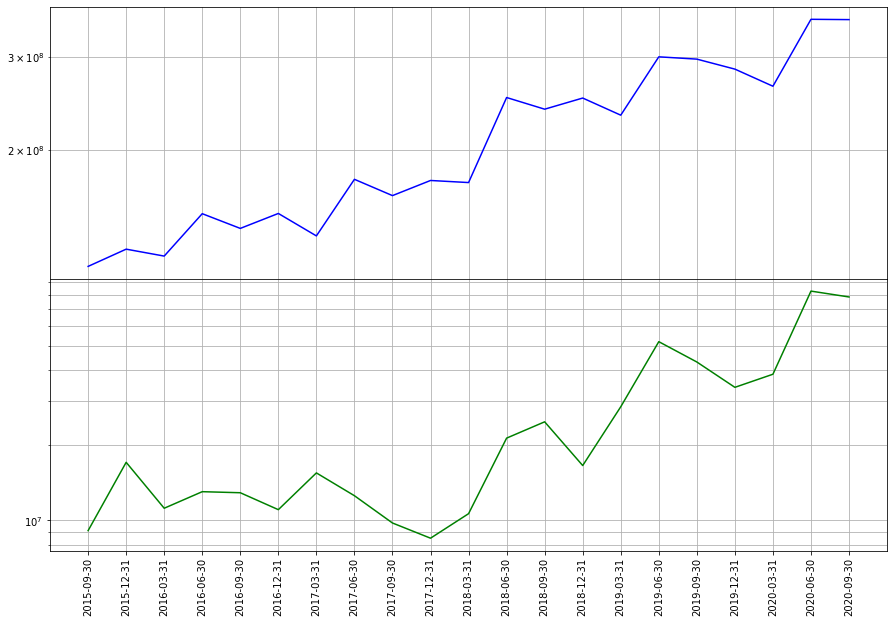

In [183]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [184]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,33.5,14.6
2018-12-31,25.3,8.4
2017-12-31,21.7,7.2
2016-12-31,24.7,8.2
2015-12-31,26.2,9.8
2014-12-31,27.8,10.6
2013-12-31,29.8,13.5


In [185]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"1,112,844,778 ( 21.9%)","148,300,536 ( -3.8%)","151,214,570 ( -7.4%)","204,937,002 ( 14.5%)"
2018-12-31,"913,114,502 ( 40.2%)","154,162,813 ( 21.1%)","163,264,307 ( 48.9%)","179,060,888 ( 47.2%)"
2017-12-31,"651,401,582 ( 14.2%)","127,346,690 ( 1.9%)","109,638,282 ( 25.8%)","121,648,057 ( 12.7%)"
2016-12-31,"570,170,395 ( 15.0%)","124,943,626 ( 25.4%)","87,173,125 ( 3.3%)","107,959,998 ( 30.6%)"
2015-12-31,"495,657,676 ( -4.5%)","99,623,970 ( 48.2%)","84,416,123 ( 19.3%)","82,646,997 ( 20.0%)"
2014-12-31,"518,743,609 ( 13.0%)","67,223,177 ( 14.3%)","70,763,219 ( 2.1%)","68,879,474 ( 68.6%)"
2013-12-31,"459,175,116 ( nan%)","58,835,101 ( nan%)","69,311,775 ( nan%)","40,846,003 ( nan%)"


In [186]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率         前复权增长
      first   last   min    max       
交易日期                                  
2016   7.25  24.82  27.0  115.4  242.3
2017  25.35  12.15  40.9  108.7  -52.1
2018  12.22  10.92  23.9   68.0  -10.6
2019  10.70  19.17  20.3   43.3   79.2
2020  18.99  35.30  19.2   48.3   85.9

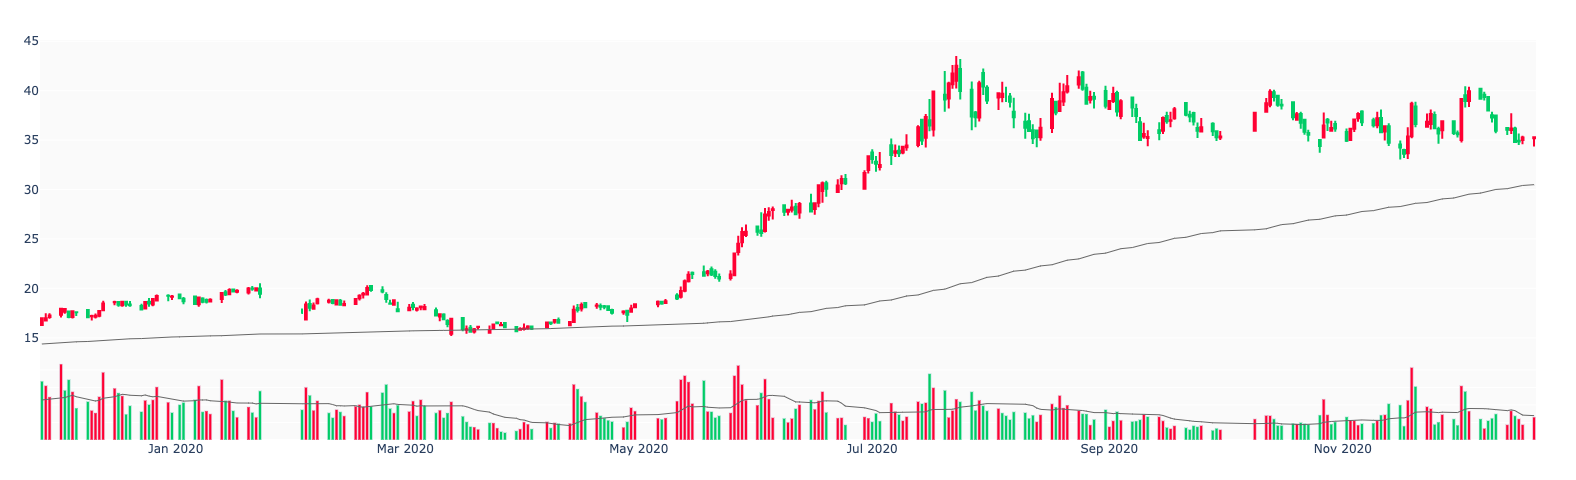

In [187]:
draw(mkt, 260, 200, 20)